In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wdbc.dataset",header=None) # Importing of dataset 
# df.head(5)# Printing first five values
#df.drop([0],axis=1)# Dropping the Patient Id

In [3]:
y=df[1]#labels
x=df.iloc[:,2:]# Putting the features into x
y=df[1].map({'M':1,'B':0})# Mapping 'B' to 0 and 'M' to 1

<h3>DATA PARTIONING</h3>

In [4]:
from sklearn.model_selection import train_test_split                        # Splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=10)

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=10)
# print(X_train.shape)

<h3>Normalization</h3>

In [5]:
def Normalize(d):               #Normalizing the dataset
    mean = d.mean()
    standard_error =d.std()
    return ((d - mean)/standard_error)
X_train_normalized= Normalize(X_train)
X_test_normalized = Normalize(X_test)
X_val_normalized = Normalize(X_val)
# print(X_train_normalized)

In [6]:
#Random Initialization of weights,bias
def random(v):
    w = np.zeros((v,1))
    b = 0
    return w,b

#Hypothesis Function
def linear(X,w,b):
    return np.dot(X,w) + b

# Sigmoid Function
def sigmoid(z):
    return 1/(1+np.exp(-z))

<h3>Logistic Model</h3>


In [7]:

# print(X_train)
y_train_np = y_train.to_numpy().reshape(460,1)
# print(y_train_np.shape)
y_val_np = y_val.to_numpy().reshape(52,1)
# print(y_val_np.shape)
y_test_np = y_test.to_numpy().reshape(57,1)
# print(y_test_np.shape)



epochs = 10000
training_models = {}
validion_models = {}
learningrate = [0.001]
losstrack=[]
validation_acc = []
validation_cost = []
training_cost = []
training_acc = []
training_loss_track = []
validation_loss_track = []

w,b = random(X_train_normalized.shape[1])
m = len(X_train_normalized)
# print(w.shape)
for i in range(len(learningrate)):
    validation_acc = []
    validation_cost = []
    training_cost = []
    training_acc = []
    for epoch in range(1000):
        z = linear(X_train_normalized,w,b)
        a = sigmoid(z)
        loss = -(np.sum(y_train_np*np.log(a) + (1-y_train_np)*np.log(1-a))/m)
        #print(loss)
        training_loss_track.append(loss)
        
        z_val = linear(X_val_normalized,w,b)
        a_val = sigmoid(z_val)
        loss_val = -(np.sum(y_val_np*np.log(a_val) + (1-y_val_np)*np.log(1-a_val))/m)
        validation_loss_track.append(loss_val)
    
        
        dz = a-y_train_np
        dw = np.dot(np.transpose(X_train_normalized),dz)/m
        db = np.sum(dz)/m
        w = w - learningrate[i] * dw
        b = b - learningrate[i] * db    
      

<h3> Test Accuracy Prediction</h3>

In [8]:
z = linear(X_test_normalized,w,b)
a = sigmoid(z)
test_prediction = np.array([1 if x>=0.5 else 0 for x in a])
test_accuracy = (100 - np.mean(np.abs(test_prediction - y_test_np.T[0]))*100)
print(test_accuracy)

96.49122807017544


<h3>Graph Between Epoch and Accuracy</h3>

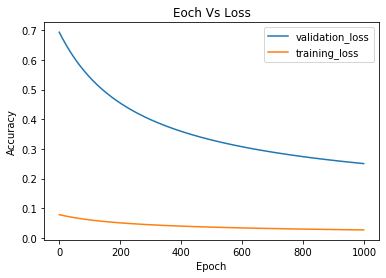

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(training_loss_track)
plt.plot(validation_loss_track)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Eoch Vs Loss")
plt.legend(['validation_loss','training_loss'], loc='upper right')
plt.show()

<h3> Graph between Epoch and Training loss</h3>

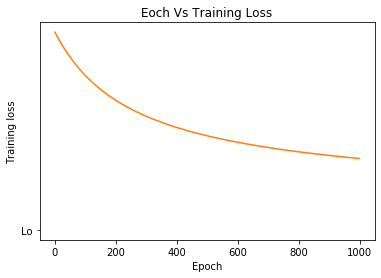

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot('Lo')
plt.plot(training_loss_track)
plt.ylabel('Training loss')
plt.xlabel('Epoch')
plt.title("Eoch Vs Training Loss")
plt.show()

<h3>Graph between Epoch and Validation loss</h3>

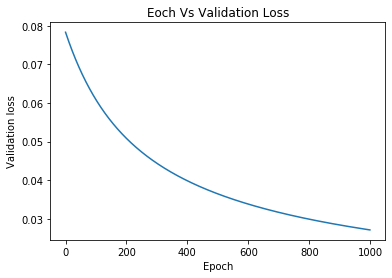

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(validation_loss_track)
plt.ylabel('Validation loss')
plt.xlabel('Epoch')
plt.title("Eoch Vs Validation Loss")
plt.show()

<h3> Calculation of Accuracy, Precision and Recall</h3>

In [12]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_prediction, y_test).ravel()
accuracy = (tp+tn)/(tn+fp+fn+tp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print('Accuracy: '+str(accuracy))
print('Precision: '+str(precision))
print('Recall: '+str(recall))

Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.9130434782608695
